In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Preprocesamiento de imágenes con una muestra menor
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% para validación
)

test_datagen =  ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% para validación
)

# Generadores de datos con menos muestras para pruebas rápidas
train_generator = train_datagen.flow_from_directory(
    'train',
    classes = ["Benign", "Malignant"],
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    'test',
    classes = ["Benign", "Malignant"],
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [100]:

# Definir el modelo CNN para clasificación binaria
model = Sequential()
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(512, (3, 3), activation='relu'))  # Aumentar filtros
model.add(MaxPooling2D(2, 2))
"""
model.add(Conv2D(128, (3, 3), activation='relu'))  # Aumentar filtros
model.add(MaxPooling2D(2, 2))"""
model.add(Flatten())
model.add(Dropout(0.5))  # Añadir Dropout para regularización
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()



Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 222, 222, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 111, 111, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 109, 109, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 54, 54, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_44 (Flatten)            │ (None, 1492992)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 1492992)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 128)            │   191,103,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,477,377 (738.06 MB)

 Trainable params: 193,477,377 (738.06 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:

# Entrenar el modelo con menos datos para pruebas rápidas
history = model.fit(
    train_generator,
    epochs=7,  # Menor número de épocas para pruebas rápidas
    steps_per_epoch=32,  # Número reducido de pasos por época
    validation_data=test_generator,
    validation_steps=32  # Número reducido de pasos para validación
)


Epoch 1/7


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/32 ━━━━━━━━━━━━━━━━━━━━ 42:49 86s/step - accuracy: 0.5938 - loss: 1.2638

KeyboardInterrupt: 

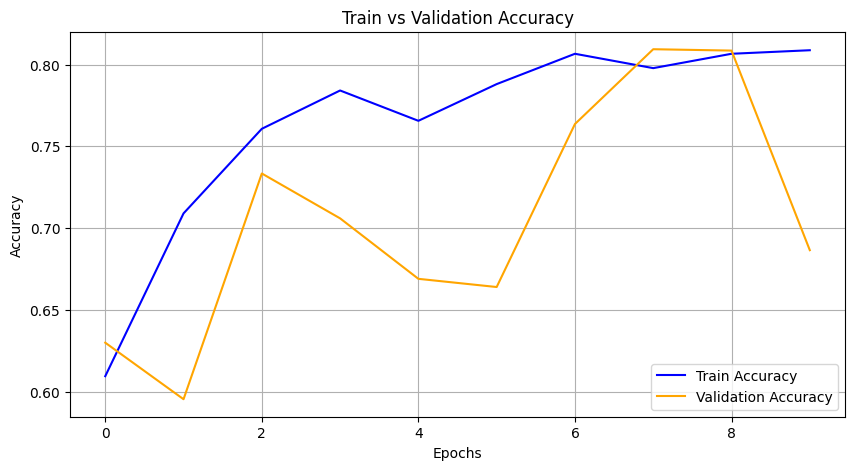

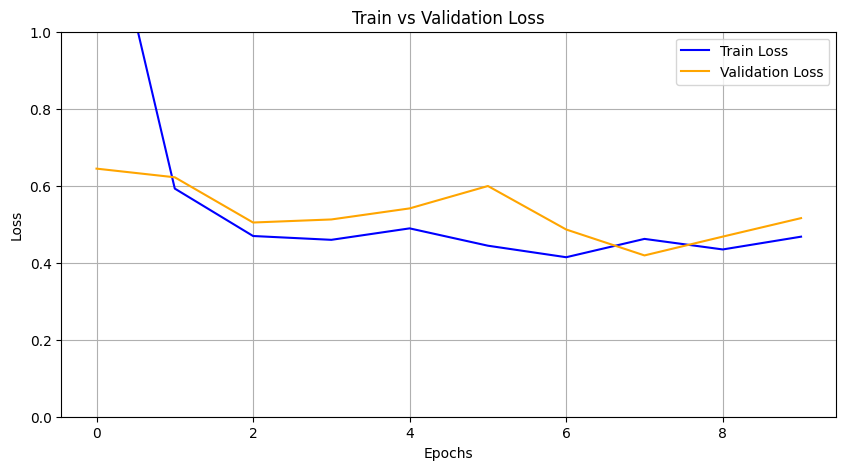

In [ ]:

# Graficar resultados (accuracy y loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Gráfica de Precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Train Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Gráfica de Pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, label='Train Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step


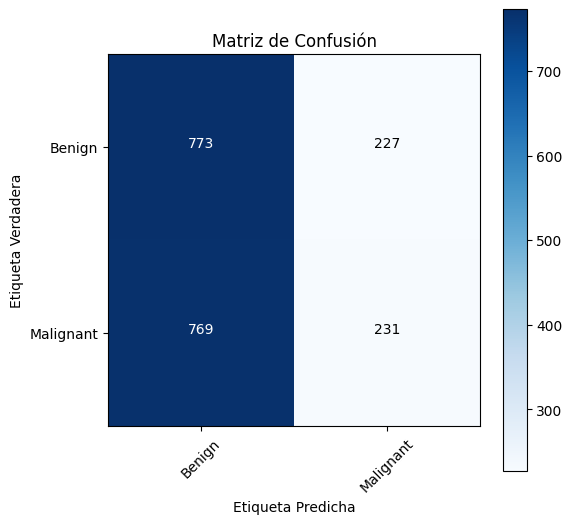

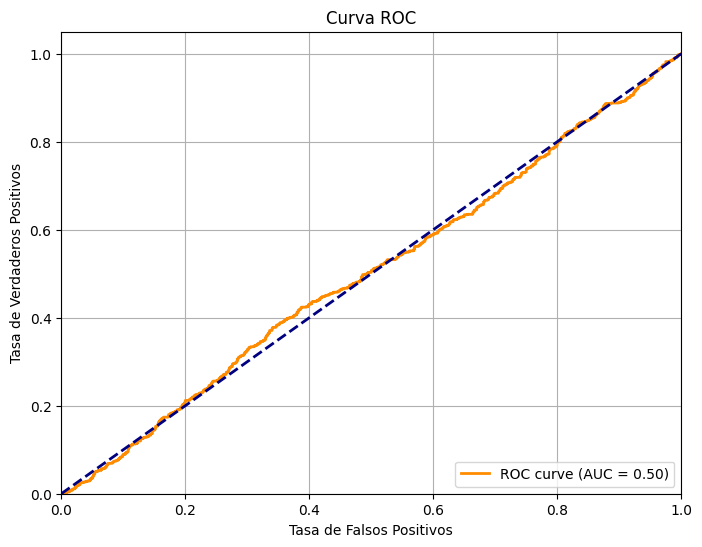

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo
y_pred = model.predict(test_generator)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Obtener las etiquetas verdaderas del generador de test
y_true = test_generator.classes

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malignant'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()